# Bagging Classifier 
## Random Forest 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset

In [4]:
from sklearn.datasets import make_moons

In [5]:
x,y = make_moons(n_samples=1000, noise=0.3)

In [6]:
df = {"Data_01":x[:,0] , "Data_02":x[:,1], "Output":y }

# Convert Array to DataFrame

In [8]:
dataset  = pd.DataFrame(df)

In [9]:
dataset

,Data_01,Data_02,Output
0,0.770891,-0.536851,1
1,1.370677,-0.097214,1
2,0.170327,0.787522,0
3,-0.696105,0.682432,0
4,0.894066,0.613046,0
...,...,...,...
995,-0.287330,0.784869,0
996,0.972061,0.248504,0
997,0.444923,-0.220707,1
998,1.586377,-0.396751,1


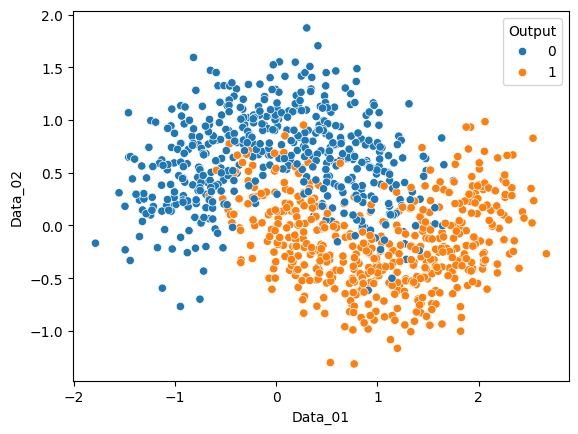

In [10]:
sns.scatterplot(x="Data_01", y="Data_02", data=dataset, hue="Output")
plt.show()

# Separtae Indep and Dep var

In [12]:
x = dataset.iloc[:,:-1]
x

,Data_01,Data_02
0,0.770891,-0.536851
1,1.370677,-0.097214
2,0.170327,0.787522
3,-0.696105,0.682432
4,0.894066,0.613046
...,...,...
995,-0.287330,0.784869
996,0.972061,0.248504
997,0.444923,-0.220707
998,1.586377,-0.396751


In [13]:
x.ndim

2

In [14]:
x = dataset.iloc[:,:-1]
y = dataset["Output"]

# Train Test Classifier

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

# Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [20]:
bg = BaggingClassifier(estimator=SVC(), n_estimators=50)    # if we estimator value change Accuracy Change 
bg.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=50)

In [21]:
# Accuracy scores
train_score = bg.score(x_train, y_train) * 100
test_score = bg.score(x_test, y_test) * 100

# Print with labels
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

Training Accuracy: 92.00%
Testing Accuracy: 87.50%


# Support Vector Classifier

In [23]:
from sklearn.svm import SVC

In [24]:
# Direct SVC use instead of Estimator Classifier that we use Bagging Classifier
sv = SVC()
sv.fit(x_train , y_train)


SVC()

In [25]:
# Accuracy scores
train_score = sv.score(x_train, y_train) * 100
test_score = sv.score(x_test, y_test) * 100

# Print with labels
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

Training Accuracy: 92.12%
Testing Accuracy: 87.50%


# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [59]:
# Accuracy scores
train_score = rf.score(x_train, y_train) * 100
test_score = rf.score(x_test, y_test) * 100

# Print with labels
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

Training Accuracy: 99.88%
Testing Accuracy: 88.00%


# 🌲 Random Forest Classifier

## 📌 Why Random Forest?
When we learn **Bagging**, we must also study **Random Forest**, because Random Forest is a **special case of Bagging**:
- Base learner = **Decision Tree**
- Uses **bootstrap sampling** (like Bagging)
- Adds **random feature selection** at each split → reduces correlation among trees.

This extra randomness makes Random Forest more **accurate and robust** than plain Bagging.

---

## ✅ Key Points
- **Ensemble Method** → builds multiple Decision Trees.  
- **Prediction** → majority vote (classification) or average (regression).  
- **Advantage** → reduces overfitting compared to a single Decision Tree.  

---

## ⚡ Minimal Code Example

```python
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(n_estimators=30, random_state=42)

# Train
rf.fit(x_train, y_train)

# Accuracy
print("Training Accuracy:", rf.score(x_train, y_train) * 100, "%")
print("Testing Accuracy:", rf.score(x_test, y_test) * 100, "%")
